<a href="https://colab.research.google.com/github/shurmez01/MAT422/blob/main/3_5_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.5 K-means

Here we provide some examples of K-means using sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


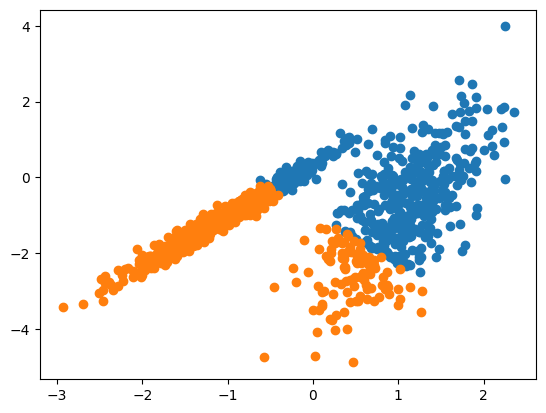

In [2]:
# import libraries
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt


# Load the data
# "_" hold the position of "y" but we are not interested in y here,
# so we can use "_" instead of creating a variable y.
X, _ = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=4)

# Using the k-means method
model = KMeans(n_clusters=2)
model.fit(X)

# Assign a cluster to each example.
yhat = model.predict(X)

# Retrieve a unique cluster.
clusters = unique(yhat)

# Create a scatter plot for the samples of each cluster.
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

# Draw the scatter plot.
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


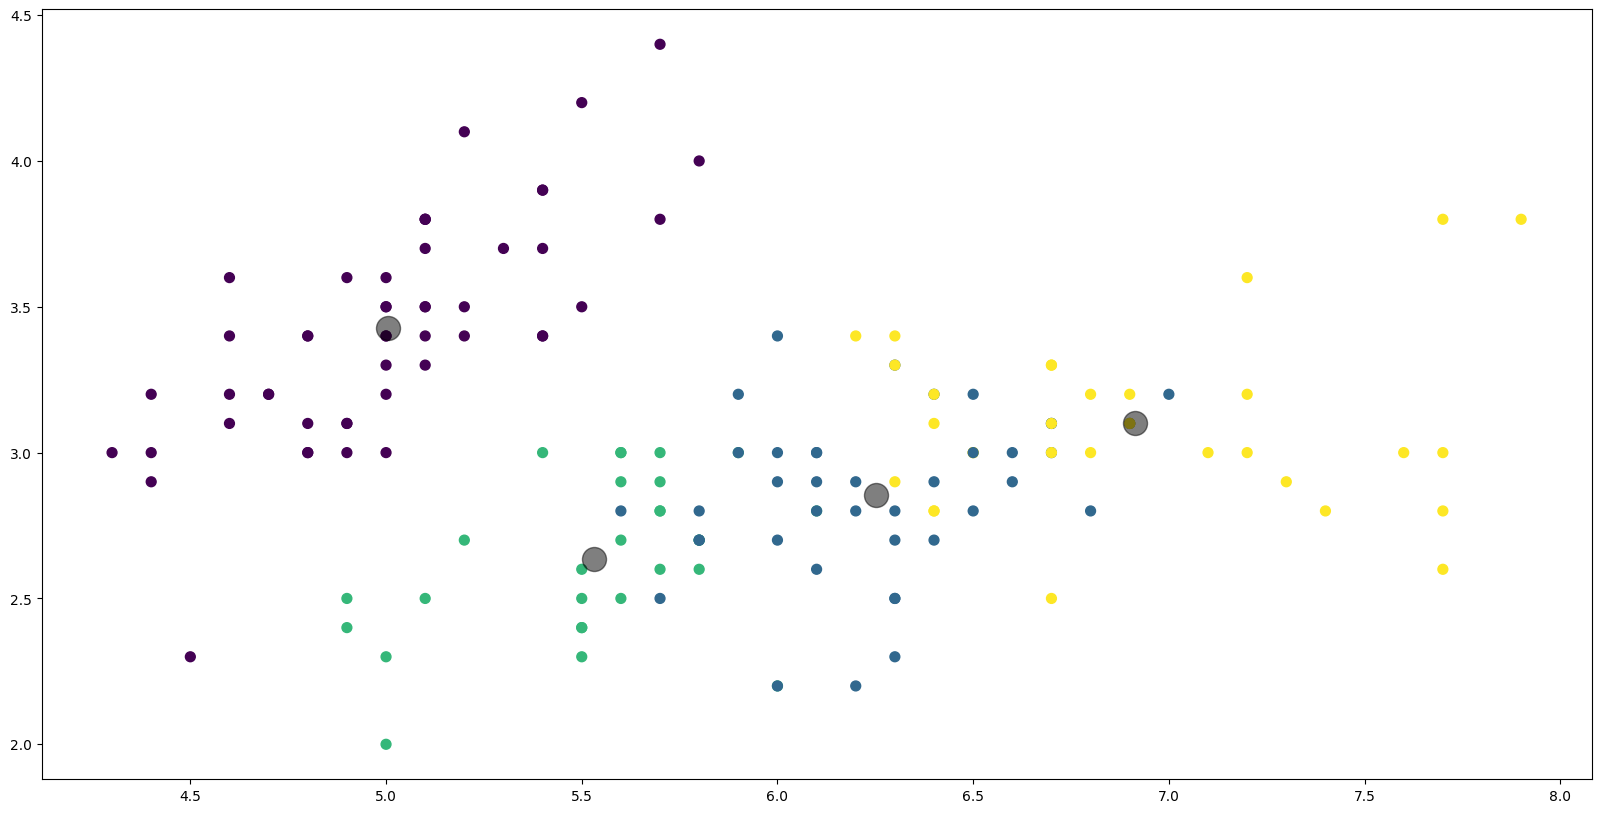

In [13]:
#
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 299, alpha = 0.5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


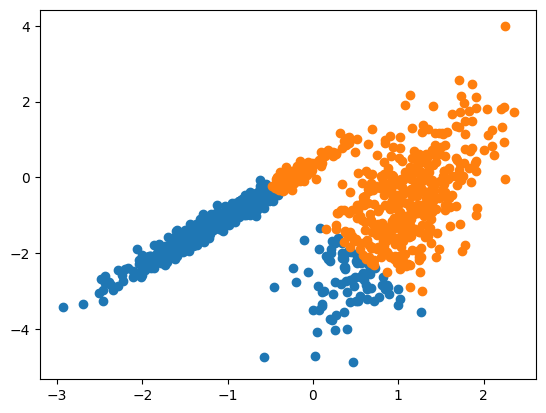

In [4]:
#2.Mini-Batch K-Means

# Data sources
X, _ = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=4)

# Using the mini-batch k-means method
model = MiniBatchKMeans(n_clusters=2)
model.fit(X)

# Assign a cluster to each example.
yhat = model.predict(X)

# Retrieve a unique cluster.
clusters = unique(yhat)

# Create a scatter plot for the samples of each cluster.
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

# Draw the scatter plot.
plt.show()

3.6 Support Vector Machine - Examples

Here, we provide three example of SVM, and introduce the sci-ki learn package: https://scikit-learn.org/stable/modules/svm.html

Copyright:

In [6]:
# For compatibility with Python 2
from __future__ import print_function

# To load datasets
from sklearn import datasets
from sklearn.datasets import make_blobs

# To import the classifier (SVM classifier)
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# To measure accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

# To support plots
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# To increase quality of figures
plt.rcParams["figure.figsize"] = (20, 10)

# To display all the plots inline
%matplotlib inline

# Basics
import numpy as np
import math
import cvxopt

# To import the scalers
from sklearn.preprocessing import MinMaxScaler

class DummyScaler:
    def fit(self, data):
        pass
    def transform(self, data):
        return data

def create_scaler_minmax():
    return MinMaxScaler()

A Simple Walk-through of the Whole Pipeline
Here we will build a SVM without using the sklearn SVC function, to show the math. Then we will also show the performance of the sklearn SVC function, to compare the results.

1.1 Build the entire math model step by step

First we define our SVM class, which contains functions that we will need later.

Instead of using gradient descent to find the best fitting line as in the case of Linear Regression, we can directly solve for w and b using the Lagrangian.

To learn more about python classes and OOP: http://hplgit.github.io/primer.html/doc/pub/class/._class-readable001.html

In [7]:
# be careful about the indentation in a long code block
class SVM(object):
  def fit(self, X, y):
    n_samples, n_features = X.shape

    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
      for j in range(n_samples):
        K[i,j] = np.dot(X[i], X[j])

    P = cvxopt.matrix(np.outer(y, y) * K)  # P = X^T X
    q = cvxopt.matrix(np.ones(n_samples) * -1) # q = -1 (1xN)
    A = cvxopt.matrix(y, (1, n_samples)) # A = y^T
    b = cvxopt.matrix(0.0) # b = 0
    G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1)) # -1 (NxN)
    h = cvxopt.matrix(np.zeros(n_samples)) # 0 (1xN)
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    a = np.ravel(solution['x']) # Lagrange multipliers
    # Lagrange have non zero lagrange multipliers
    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    self.a = a[sv]
    self.sv = X[sv]
    self.sv_y = y[sv]
    self.b = 0  # Intercept
    for n in range(len(self.a)):
      self.b += self.sv_y[n]
      self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
      self.b /= len(self.a)

    # Weights
    self.w = np.zeros(n_features)
    for n in range(len(self.a)):
      self.w += self.a[n] * self.sv_y[n] * self.sv[n]

  def project(self, X):
    return np.dot(X, self.w) + self.b

  def predict(self, X):
    return np.sign(self.project(X))

Next we generate some linearly separable data.

We label the negative samples as -1 instead of 0. The package cvxopt expects the data to be in a specific format which is why we take an intermediate step.

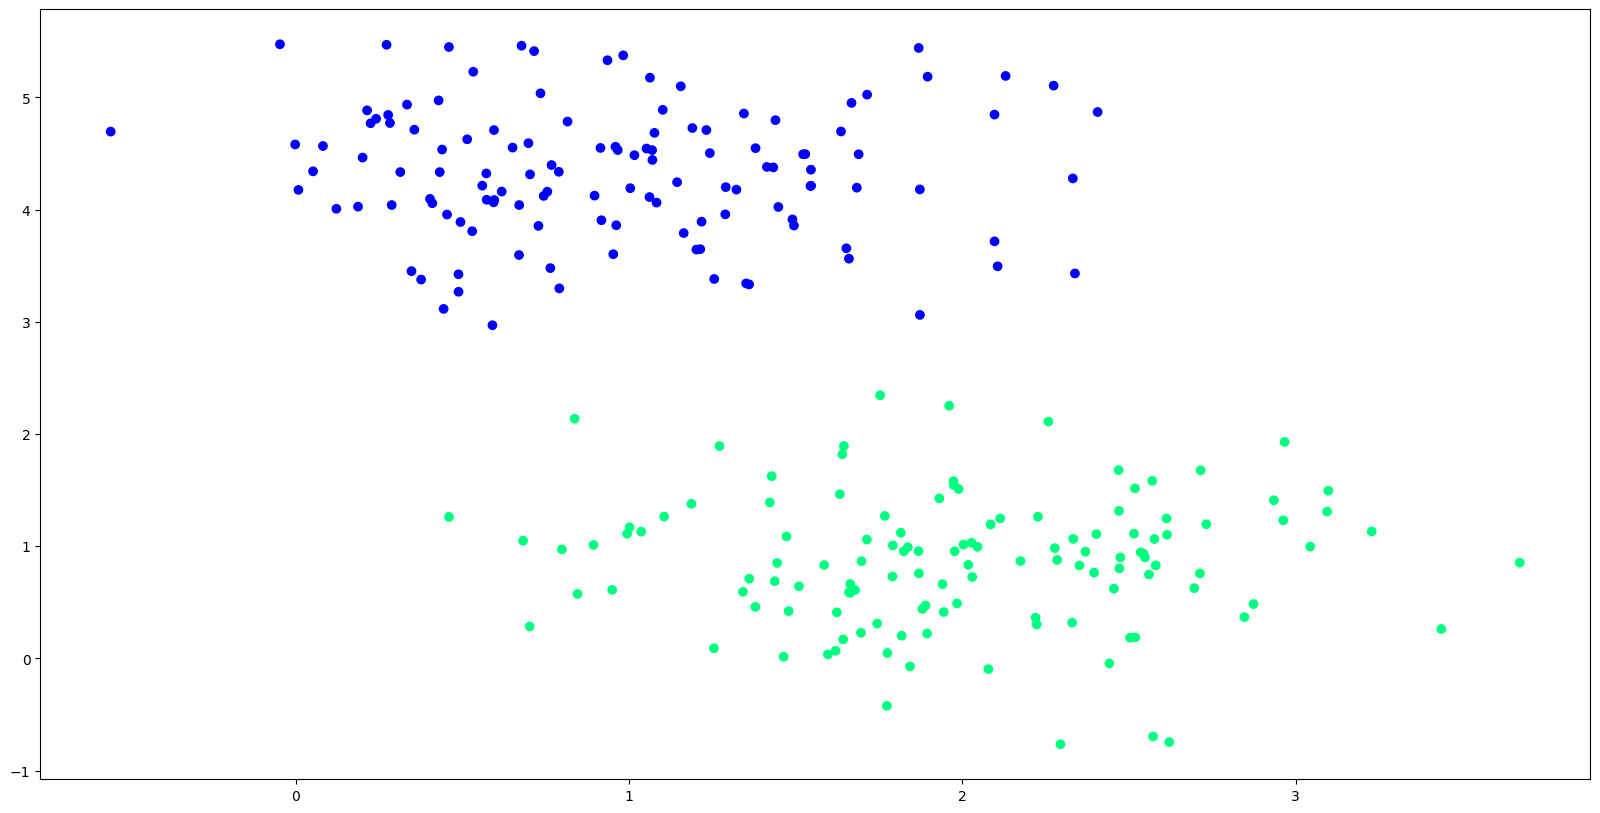

In [8]:

X, y = make_blobs(n_samples = 250, centers = 2,
                  random_state = 0, cluster_std = 0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

# plot the data we just generated
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'winter')

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# initiate a new object of the SVM class we just created, so it can use all the functions we made inside that SVM class
# svm is a model
svm = SVM()

# fit the training data to the model
svm.fit(X_train, y_train)



In [ ]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')

# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')

# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')



SVM with different kernels with the Iris dataset
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper as an example of linear discriminant analysis. It is perhaps the best known database to be found in the pattern recognition literature.

More information can be found here: https://archive.ics.uci.edu/ml/datasets/iris

Classes: 3 - 3 kinds of iris
Samples per class: 50
Samples total: 150
Dimensionality: 4 - 4 parameters of the iris flowers
Features: real, positive


In [9]:
X, y = datasets.load_iris(return_X_y = True)

# returns all the data as X, and their corresponding classes as y
# 4 columns in total, for the four parameters
# check the document for load_iris() function: https://scikit-learn.org/stable/modules/generated/sklearn.dataset

In [11]:
X_trimmed = X[:, 1:3] # keep all the rows, column 1 and 2
X_trimmed = X_trimmed[y != 0, :] # delete the data in X that belongs to class 0
y_trimmed = y[y != 0] # delete all the class 0 tags in y

# scale the data for better performance
create_scaler = create_scaler_minmax
scaler = create_scaler()
scaler.fit(X_trimmed)
X_trimmed = scaler.transform(X_trimmed)



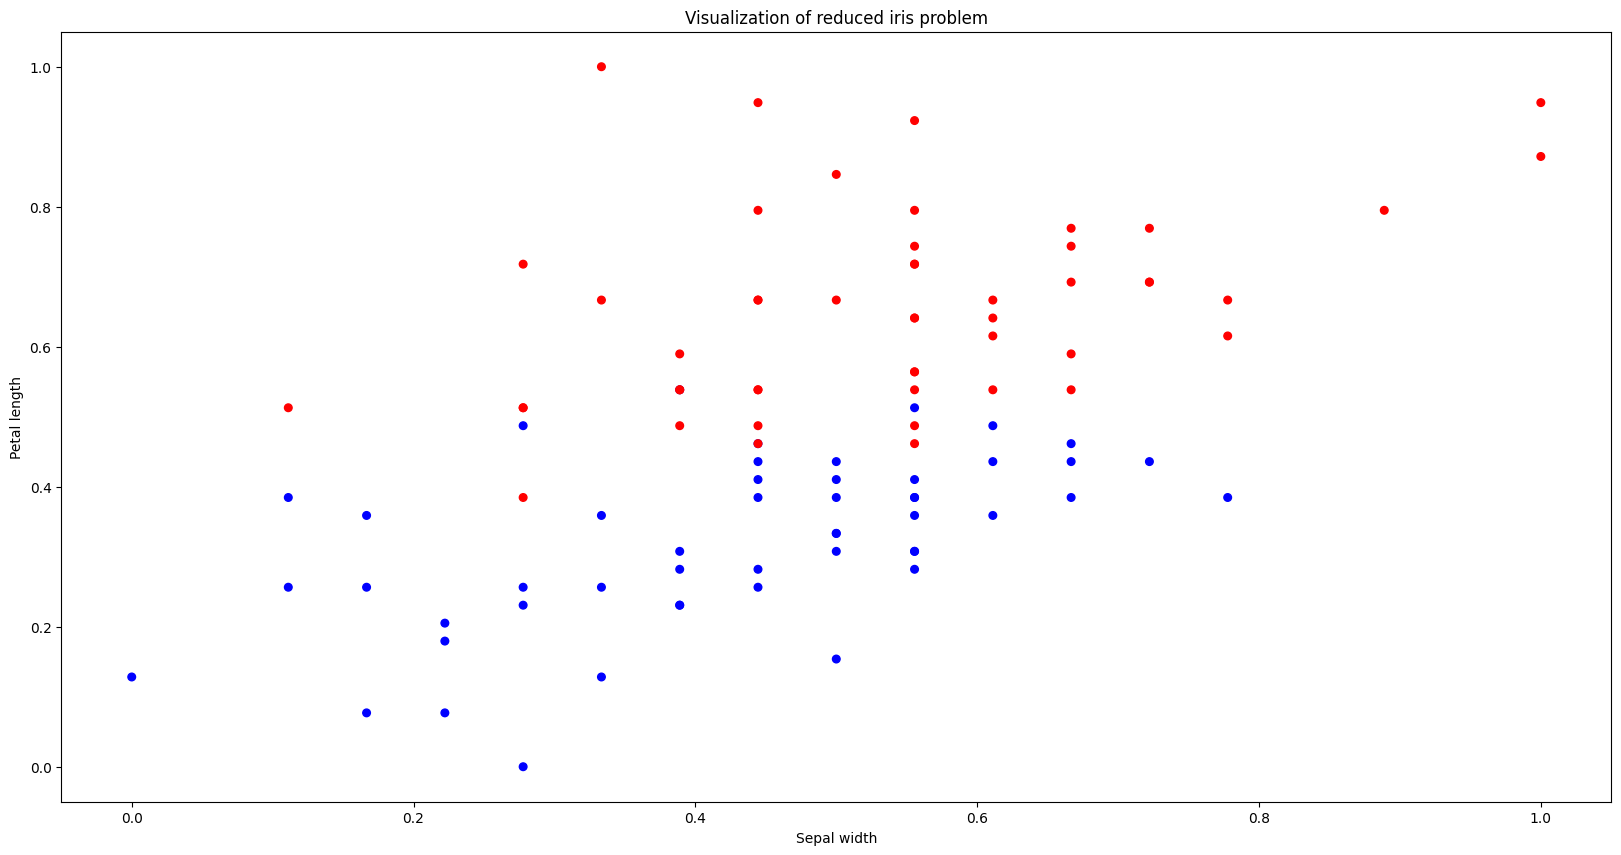

In [12]:
plt.scatter(X_trimmed[:, 0], X_trimmed[:, 1], # these are the data of the 2 parameters picked
            c = y_trimmed, # y is the class of each dot, represented by blue and red
            s = 30, cmap = plt.cm.bwr)

plt.title('Visualization of reduced iris problem')
plt.xlabel('Sepal width')  # X_trimmed[:, 0], column 0
plt.ylabel('Petal length') # X_trimmed[:, 1], column 1
plt.show()